In [1]:
from keras.datasets import mnist
(x_trains, y_trains), (x_tests, y_tests) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(len(x_trains))
print(len(y_trains))
print(len(x_tests))
print(len(y_tests))

60000
60000
10000
10000


In [3]:
print(x_trains)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


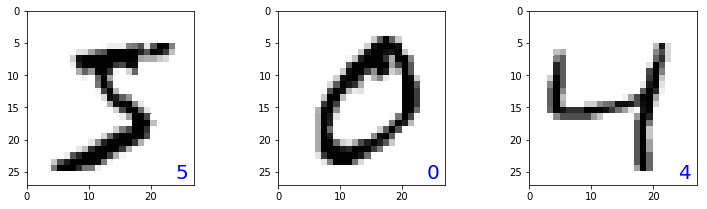

In [4]:
# グラフをNotebook上に出力する
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.ﬁgure(1, ﬁgsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    # 784個のRGB値を28×28の行列に変換する
    img = x_trains[id, :, :].reshape(28, 28)
    # 色相を反転させてプロットする
    plt.pcolor(255 - img)
    # 画像の正解値をプロット
    plt.text(24, 26, "%d" % y_trains[id],
             color='blue', fontsize=20)
    plt.xlim(0, 27) # x軸を0~28の範囲
    plt.ylim(27, 0) # y軸を28~0の範囲
plt.show()

In [5]:
# 60000x28x28の2次元配列を60000×784の行列に変換
x_trains = x_trains.reshape(60000, 784)
# データを255で割って0.99を掛けた後、0.01を加えてシフトする
x_trains = (x_trains / 255.0 * 0.99) + 0.01

In [6]:
print(y_trains)

[5 0 4 ... 5 6 8]


In [7]:
# 出力層のニューロンの数
output_neurons = 10
# 出力層のニューロン数に合わせて0.01で初期化した配列を作成
targets = np.zeros(output_neurons) + 0.01
# 正解ラベル(3)に対応する4番目の要素を0.99にする
targets[4] = 0.99
print(targets)

[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]


In [8]:
targets = np.array([])
for (label) in ( y_trains):
    # 出力層のニューロン数に合わせて目標配列を作成
    target = np.zeros(10) + 0.01
    # 正解値に対応する要素を0.99にする
    target[int(label)] = 0.99
    targets = np.append(targets, target)
print(targets)

[0.01 0.01 0.01 ... 0.01 0.99 0.01]


7


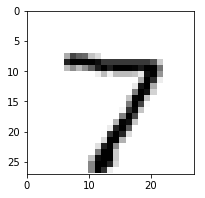

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

print(y_tests[0])      # 1番目の正解ラベルを出力

plt.ﬁgure(ﬁgsize=(3, 3))
plt.gray()
# 784個のピクセル値を28×28の行列にする
img = x_tests[0, :, :].reshape(28, 28)
# 色相を反転させてプロットする
plt.pcolor(255 - img)
plt.xlim(0, 27) # x軸を0~28の範囲
plt.ylim(27, 0) # y軸を28~0の範囲
plt.show()